# Homework 2 - Exploring Public Salary Data from the City of Chicago

## Abstract

This solution reviews publicly [available salary information](https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w) of employees as published by the [City of Chicago's Data Portal](https://data.cityofchicago.org/).


## Getting Data

This solution uses [Requests](https://requests.readthedocs.io/en/master/user/quickstart/#json-response-content) to make HTTP API requests.

Data is fetched from the City of Chicago's open data portal - https://data.cityofchicago.org/resource/xzkq-xp2w.json?$limit=50000

The url above includes a querystring parameter `$limit` to ensure the full data set of ~33,000 records is retrieved.  

In [101]:
## create conda environment
import sys
!conda create --yes --prefix {sys.prefix}


CondaValueError: The target prefix is the base prefix. Aborting.



In [102]:
## install requests package
import sys
!conda install -c conda-forge --yes --prefix {sys.prefix} requests

Solving environment: done

## Package Plan ##

  environment location: /Users/natburgwyn/opt/anaconda3

  added / updated specs:
    - requests


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py38h5347e94_2         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                4.8.5-py38h32f6830_1 --> 4.8.5-py38h5347e94_2



conda-4.8.5          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [161]:
## import path for saving response
import os.path

## import requests for HTTP requests
import requests

## import json to saving API response
import json

## import pandas for data analysis
import pandas as pd

## fetch data
r = requests.get('https://data.cityofchicago.org/resource/xzkq-xp2w.json?$limit=50000')

## check HTTP response code
print('HTTP Status Code: ' + str(r.status_code))

## the HTTP response contains a few headers that provide additional context
print(r.headers['Last-Modified'])
print(r.headers['X-SODA2-Fields'])
print(r.headers['X-SODA2-Types'])

## build DataFrame from JSON response
# df = pd.DataFrame.from_dict(r.json())

## build DataFrame from JSON response saved to file
with open(os.path.join('data', 'chicago_employee_salary_data.json'), 'r') as file:
    data = json.load(file)
    
# load DataFrame
df = pd.DataFrame.from_dict(data)

## review data structure
df.head()

HTTP Status Code: 200
Wed, 29 Jul 2020 21:14:14 GMT
["name","job_titles","department","full_or_part_time","salary_or_hourly","typical_hours","annual_salary","hourly_rate"]
["text","text","text","text","text","number","number","number"]


,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,typical_hours,hourly_rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,111444.0,NaN,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,94122.0,NaN,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,118608.0,NaN,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,117072.0,NaN,NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,NaN,40.0,44.4


## Data Analysis



In [105]:
## clean up the data

## default NaN to 0
df.fillna(0)

## view datatypes
print(df.dtypes)

## cast salary, hours and rate to numeric
df['annual_salary'] = pd.to_numeric(df['annual_salary'],errors='coerce')
df['typical_hours'] = pd.to_numeric(df['typical_hours'],errors='coerce')
df['hourly_rate'] = pd.to_numeric(df['hourly_rate'],errors='coerce')

## view updated datatypes
print(df.dtypes)

name                 object
job_titles           object
department           object
full_or_part_time    object
salary_or_hourly     object
annual_salary        object
typical_hours        object
hourly_rate          object
dtype: object
name                  object
job_titles            object
department            object
full_or_part_time     object
salary_or_hourly      object
annual_salary        float64
typical_hours        float64
hourly_rate          float64
dtype: object


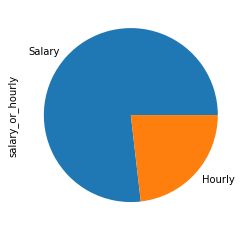

In [135]:
## visualize break down of salaried vs hourly employees
df.salary_or_hourly.value_counts().plot.pie()

In [106]:
## create a DataFrame of salary employees
salaried_employees = df[df['salary_or_hourly'] == 'Salary']

salaried_employees.head()

,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,typical_hours,hourly_rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,111444.0,NaN,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,94122.0,NaN,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,118608.0,NaN,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,117072.0,NaN,NaN
5,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,68616.0,NaN,NaN


Min: 20400.0
Mean: 89609.2195137762
Median: 90024.0
Max: 275004.0


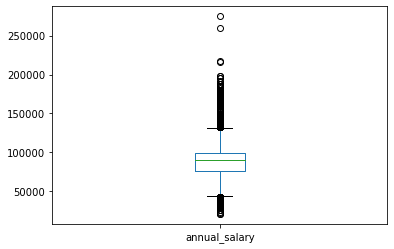

In [107]:
print('Min: ' + str(salaried_employees['annual_salary'].min()))
print('Mean: ' + str(salaried_employees['annual_salary'].mean()))
print('Median: ' + str(salaried_employees['annual_salary'].median()))
print('Max: ' + str(salaried_employees['annual_salary'].max()))

salaried_employees['annual_salary'].plot(kind = 'box')

In [145]:
# determine highest paid employee
max_employee = salaried_employees[salaried_employees['annual_salary'] == salaried_employees['annual_salary'].max()]

print(max_employee['name'] + ' ' + str(max_employee['annual_salary']))
print(max_employee['job_titles'] + ' - ' + max_employee['department'])

24428    RHEE,  JAMIE L 24428    275004.0\nName: annual...
Name: name, dtype: object
24428    COMMISSIONER OF AVIATION - AVIATION
dtype: object


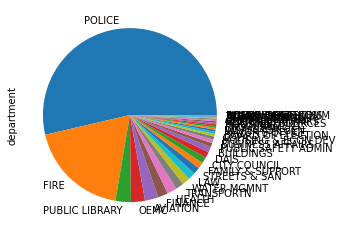

In [109]:
# plot pie of departments
salaried_employees['department'].value_counts().plot(kind = 'pie')

In [153]:
# list total wages by department
salaried_employees.groupby(['department']).sum().sort_values(by= 'annual_salary', ascending= False)

,annual_salary,typical_hours,hourly_rate
department,,,
POLICE,1.214316e+09,0.0,0.0
FIRE,4.574911e+08,0.0,0.0
PUBLIC LIBRARY,5.343571e+07,0.0,0.0
AVIATION,5.037014e+07,0.0,0.0
OEMC,4.914304e+07,0.0,0.0
HEALTH,4.124458e+07,0.0,0.0
FINANCE,3.675674e+07,0.0,0.0
TRANSPORTN,3.663862e+07,0.0,0.0
WATER MGMNT,3.531151e+07,0.0,0.0


In [150]:
salaried_employees.groupby(['department']).median().sort_values(by= 'annual_salary')

,annual_salary,typical_hours,hourly_rate
department,,,
BOARD OF ELECTION,46860.0,NaN,NaN
CITY COUNCIL,64632.0,NaN,NaN
ANIMAL CONTRL,67944.0,NaN,NaN
CITY CLERK,72024.0,NaN,NaN
PUBLIC LIBRARY,73932.0,NaN,NaN
OEMC,73992.0,NaN,NaN
COPA,73992.0,NaN,NaN
FINANCE,74568.0,NaN,NaN
ADMIN HEARNG,74568.0,NaN,NaN


In [151]:
salaried_employees.groupby(['job_titles', 'department']).median().sort_values(by= 'annual_salary')

,,annual_salary,typical_hours,hourly_rate
job_titles,department,,,
COMMITTEE SECRETARY,CITY COUNCIL,25848.0,NaN,NaN
ELECTION EQUIPMENT & SUPPLY SPEC I,BOARD OF ELECTION,30060.0,NaN,NaN
POLLING PLACE INVESTIGATOR I,BOARD OF ELECTION,30822.0,NaN,NaN
CLERK - BD OF ELECTIONS,BOARD OF ELECTION,31584.0,NaN,NaN
ELECTION EQUIPMENT & SUPPLY SPEC II,BOARD OF ELECTION,34860.0,NaN,NaN
...,...,...,...,...
FIRST DEPUTY FIRE COMMISSIONER,FIRE,197736.0,NaN,NaN
MAYOR,MAYOR'S OFFICE,216210.0,NaN,NaN
FIRE COMMISSIONER,FIRE,217728.0,NaN,NaN


In [156]:
# DataFrame of the police dept
police_dept = salaried_employees[salaried_employees['department'] == 'POLICE']

# display the unique titles in the police department and median salary
police_dept.groupby(['job_titles']).median().sort_values(by= 'annual_salary')

,annual_salary,typical_hours,hourly_rate
job_titles,,,
POLICE ADMINISTRATIVE CLERK,46428.0,NaN,NaN
MANAGER OF DATA ENTRY OPERATORS,51324.0,NaN,NaN
DOMESTIC VIOLENCE ADVOCATE,51732.0,NaN,NaN
PHOTOGRAPHIC SPECIALIST-PUBLIC SAFETY,53736.0,NaN,NaN
FREEDOM OF INFORMATION ACT OFFICER,58500.0,NaN,NaN
...,...,...,...
SUPERINTENDENT'S CHIEF OF STAFF,180240.0,NaN,NaN
CHIEF,185364.0,NaN,NaN
DEPUTY SUPERINTENDENT,192000.0,NaN,NaN


In [110]:
## create a DataFrame of salary employees
hourly_employees = df[df['salary_or_hourly'] == 'Hourly']

hourly_employees.head()

,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,typical_hours,hourly_rate
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,NaN,40.0,44.40
6,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,NaN,20.0,19.86
7,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,NaN,40.0,50.00
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,NaN,20.0,3.00
21,"ABDULLAH, RASHAD",ELECTRICAL MECHANIC (AUTOMOTIVE),DAIS,F,Hourly,NaN,40.0,50.00


In [111]:
print('Min: ' + str(hourly_employees['hourly_rate'].min()))
print('Mean: ' + str(hourly_employees['hourly_rate'].mean()))
print('Median: ' + str(hourly_employees['hourly_rate'].median()))
print('Max: ' + str(hourly_employees['hourly_rate'].max()))

Min: 3.0
Mean: 35.192483291835586
Median: 38.35
Max: 128.0


In [138]:
## find top hourly employee
max_hourly = hourly_employees[hourly_employees['hourly_rate'] == hourly_employees['hourly_rate'].max()]

print(max_hourly)

                 name    job_titles department full_or_part_time  \
14384  JONES,  JOHN W  PSYCHIATRIST     HEALTH                 F   

      salary_or_hourly  annual_salary  typical_hours  hourly_rate  
14384           Hourly            NaN           35.0        128.0  


In [144]:
## find top hourly employee
min_hourly = hourly_employees[hourly_employees['hourly_rate'] == hourly_employees['hourly_rate'].min()]

## display job title for lowest hourly rate
print(min_hourly['job_titles'].unique())

## display department for lowest hourly rate
print(min_hourly['department'].unique())

['FOSTER GRANDPARENT' 'SENIOR COMPANION']
['FAMILY & SUPPORT']


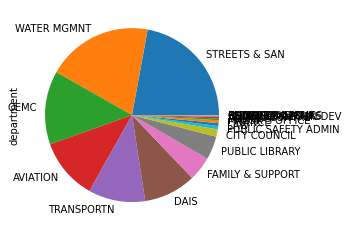

In [113]:
# visualize the largest employers of hourly workers
hourly_employees['department'].value_counts().plot(kind = 'pie')